# Inspección de mamogramas

In [ ]:
%load_ext autoreload
%autoreload 2

In [26]:
import seaborn as sns
from collections import Counter

from bcd.utils.paths import data_raw_dir
from bcd.utils.analyze_images import analyze_images
from bcd.visualization.visualize import (
    plot_size_distribution,
    plot_aspect_ratio_distribution,
    display_sample_images,
)

sns.set_theme()

## Inspección

Realizamos un análisis de las imágenes para establecer los hiperparámetros relacionads con la dimensionalidad de la entrada de la red convolucional. Es decir, el input_shape el cual curresponde a una tupla (width, height, n_channels).

In [ ]:
widths, heights, aspects = analyze_images(data_raw_dir("train/"))

In [21]:
# Print summary statistics
print(f"Total images analyzed: {len(widths)}")
print(f"Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.2f}, Median: {np.median(widths)}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.2f}, Median: {np.median(heights)}")
print(f"Aspect Ratio - Min: {min(aspects):.2f}, Max: {max(aspects):.2f}, Mean: {np.mean(aspects):.2f}, Median: {np.median(aspects):.2f}")

# Find most common sizes
common_sizes = Counter(zip(widths, heights)).most_common(5)
print("\nMost common image sizes:")
for size, count in common_sizes:
    print(f"{size}: {count} images")

# Recommend image size
recommended_width = int(np.median(widths))
recommended_height = int(np.median(heights))
print(f"\nRecommended image size for the network: {recommended_width}x{recommended_height}")
print("Note: Round to the nearest multiple of 32 for optimal performance with most CNN architectures.")

# Adjust if necessary to be multiples of 32
recommended_width = ((recommended_width + 31) // 32) * 32
recommended_height = ((recommended_height + 31) // 32) * 32
print(f"Adjusted recommended size: {recommended_width}x{recommended_height}")

Total images analyzed: 54706
Width - Min: 256, Max: 256, Mean: 256.00, Median: 256.0
Height - Min: 256, Max: 256, Mean: 256.00, Median: 256.0
Aspect Ratio - Min: 1.00, Max: 1.00, Mean: 1.00, Median: 1.00

Most common image sizes:
(256, 256): 54706 images

Recommended image size for the network: 256x256
Note: Round to the nearest multiple of 32 for optimal performance with most CNN architectures.
Adjusted recommended size: 256x256


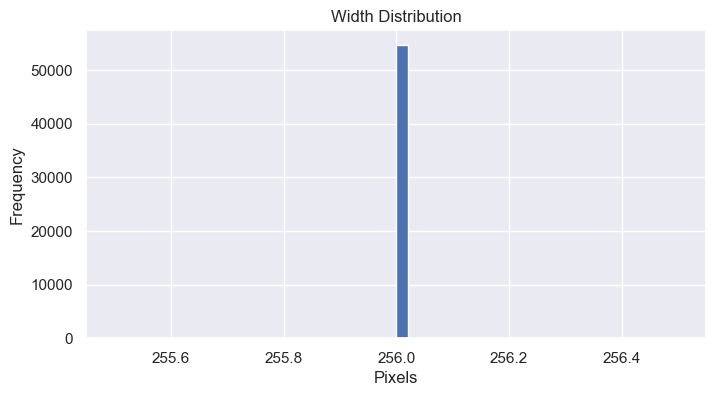

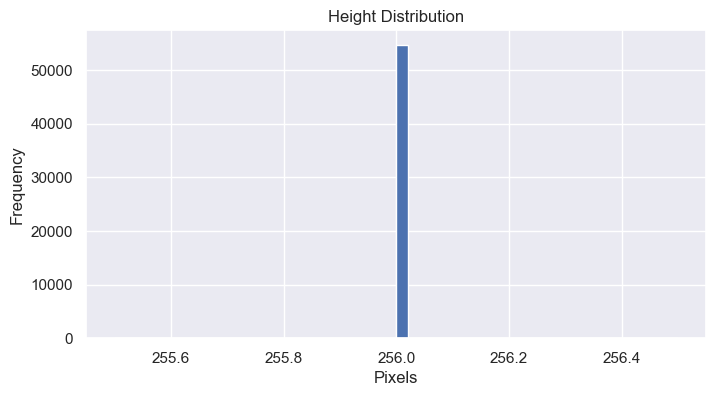

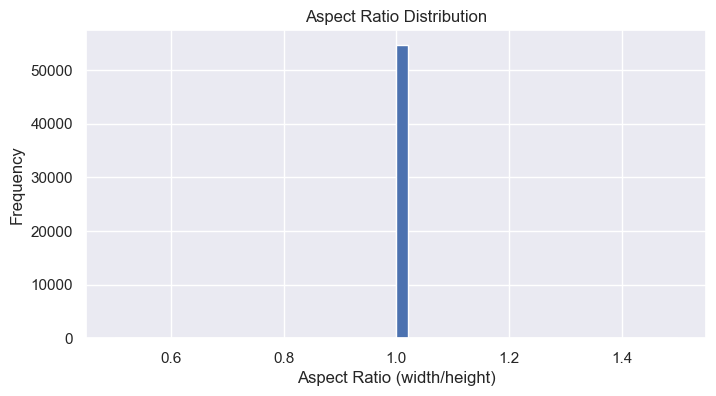

In [22]:
# Plot distributions
plot_size_distribution(widths, 'Width')
plot_size_distribution(heights, 'Height')
plot_aspect_ratio_distribution(aspects)

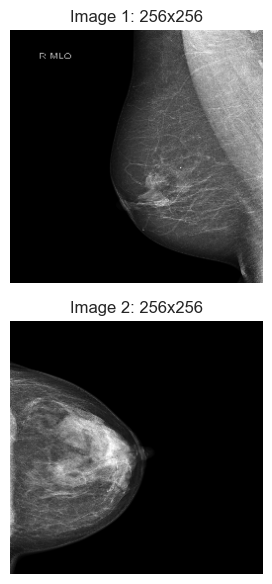

In [23]:
# Display sample images
display_sample_images(data_raw_dir("train/"), 2)